References for this code from the following sources:
https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb

https://github.com/jerielizabeth/Gospel-of-Health-Notebooks

In [1]:
import nltk
import pickle5 as pickle
import carmen
from pyarrow import json
import jsonlines
import json_lines
import spacy
import tokenizer
from json2parquet import convert_json
import csv
import ijson
from nltk.tokenize import word_tokenize
import gensim
from itertools import chain
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from functools import partial
import numpy as np
import datetime
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

import pyarrow.parquet as pq
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #for plotting purpose
# from sklearn.preprocessing import linear_model
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
# %matplotlib inline"
from gensim.models import CoherenceModel
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
nltk.download('punkt')
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import collections 
# import smpi.statsmodels as ssm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import nltk
from nltk.corpus import stopwords

from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import gensim
from gensim import corpora
from pprint import pprint
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

import datetime
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import webcolors
import folium
plt.rcParams.update({'figure.figsize': (30, 30), 'figure.dpi': 120})

Importing plotly failed. Interactive plots will not work.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austingerner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def stateNames(stateAbbreviation):

    states = {
            'AK': 'Alaska',
            'AL': 'Alabama',
            'AR': 'Arkansas',
            'AS': 'American Samoa',
            'AZ': 'Arizona',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DC': 'District of Columbia',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'GU': 'Guam',
            'HI': 'Hawaii',
            'IA': 'Iowa',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'MA': 'Massachusetts',
            'MD': 'Maryland',
            'ME': 'Maine',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MO': 'Missouri',
            'MP': 'Northern Mariana Islands',
            'MS': 'Mississippi',
            'MT': 'Montana',
            'NA': 'National',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'NE': 'Nebraska',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NV': 'Nevada',
            'NY': 'New York',
            'NYC': 'New York',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
            'PR': 'Puerto Rico',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VA': 'Virginia',
            'VI': 'Virgin Islands',
            'VT': 'Vermont',
            'WA': 'Washington',
            'WI': 'Wisconsin',
            'WV': 'West Virginia',
            'WY': 'Wyoming'
    }

    if(stateAbbreviation is not None):
        if(stateAbbreviation in states):
            return states[stateAbbreviation]
        else:
            return "N/A"   
    else:
        return "N/A"   
    


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Data Exploration & Data Cleaning

In [4]:
# covid_hashtags_full_preprocessed_df = pd.read_pickle('august_2020_tweets_topic_distribution.pkl')
cdc_covid_data_df_raw = pd.read_csv("/Users/austingerner/Documents/gw/capstone/modeling/predictive/data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
cdc_covid_data_df_raw['month'] = pd.DatetimeIndex(cdc_covid_data_df_raw['submission_date']).month
cdc_covid_data_df = cdc_covid_data_df_raw.groupby(['month', 'state']).agg({'new_case': 'sum', 'new_death': 'sum'}).reset_index()
cdc_covid_data_df.state = cdc_covid_data_df.state.apply(lambda x: stateNames(x))



In [5]:
tweets_distribution_geolocation_df = pd.read_pickle("/Users/austingerner/Documents/gw/capstone/modeling/lda/data/tweet_topic_distribution_location.pkl")
tweets_distribution_geolocation_df = tweets_distribution_geolocation_df.drop(columns = ['tidy_tweet','tidy_tweet_tokens', 'tokens_no_stop',
                                                                                        'hashtags', 'stemmed', 'new_tweets_corpus', 'max_count', 'total_docs',
                                                                                       'no_stop_joined', 'created_at'])



In [6]:
sentiment_analysis_vader_results_df = pd.read_pickle('/Users/austingerner/Documents/gw/capstone/modeling/sentiment/data/sentiment_analysis_vader_results_capstone.pkl')
sentiment_analysis_vader_results_df = sentiment_analysis_vader_results_df.drop(columns = ['tokens_no_stop', 'tidy_tweet', 'lemmatized'])
sentiment_analysis_vader_results_df.head()


,id,topic_id,negative,neutral,positive,compound,sentiment
0,1252570534250008577,33,0.148,0.634,0.218,0.2500,1
1,1303414058255675392,11,0.000,1.000,0.000,0.0000,0
3,1248188906148892673,65,0.000,0.677,0.323,0.5106,1
4,1282149524442472448,0,0.000,1.000,0.000,0.0000,0
9,1308399742993473538,60,0.242,0.758,0.000,-0.4939,-1


In [7]:
tweets_distribution_sentiment_geolocation_df = pd.merge(tweets_distribution_geolocation_df, sentiment_analysis_vader_results_df, left_on=['id', 'topic_id'], right_on = ['id', 'topic_id'])
tweets_distribution_sentiment_geolocation_new_cases_deaths = pd.merge(tweets_distribution_sentiment_geolocation_df, cdc_covid_data_df, left_on=['state', 'created_at_month'], right_on = ['state', 'month'])
tweets_distribution_sentiment_geolocation_new_cases_deaths.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True)
tweets_distribution_sentiment_geolocation_new_cases_deaths['count'] = 1
tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.sort_values(by=["state",'created_at_month'], ascending=[True, True])



In [8]:
cdc_covid_data_df.head()
overall_cdc_new_cases = cdc_covid_data_df.groupby(['month']).agg({'new_case': 'sum', 'new_death': 'sum'}).reset_index()


In [15]:
overall_cdc_new_cases.head()

,month,new_case,new_death
0,3,212337,4946
1,4,876478,60233
2,5,744102,41747
3,6,860856,20710
4,7,1938296,30518


Text(0.5, 1.0, 'US Deaths March - November, 2020')

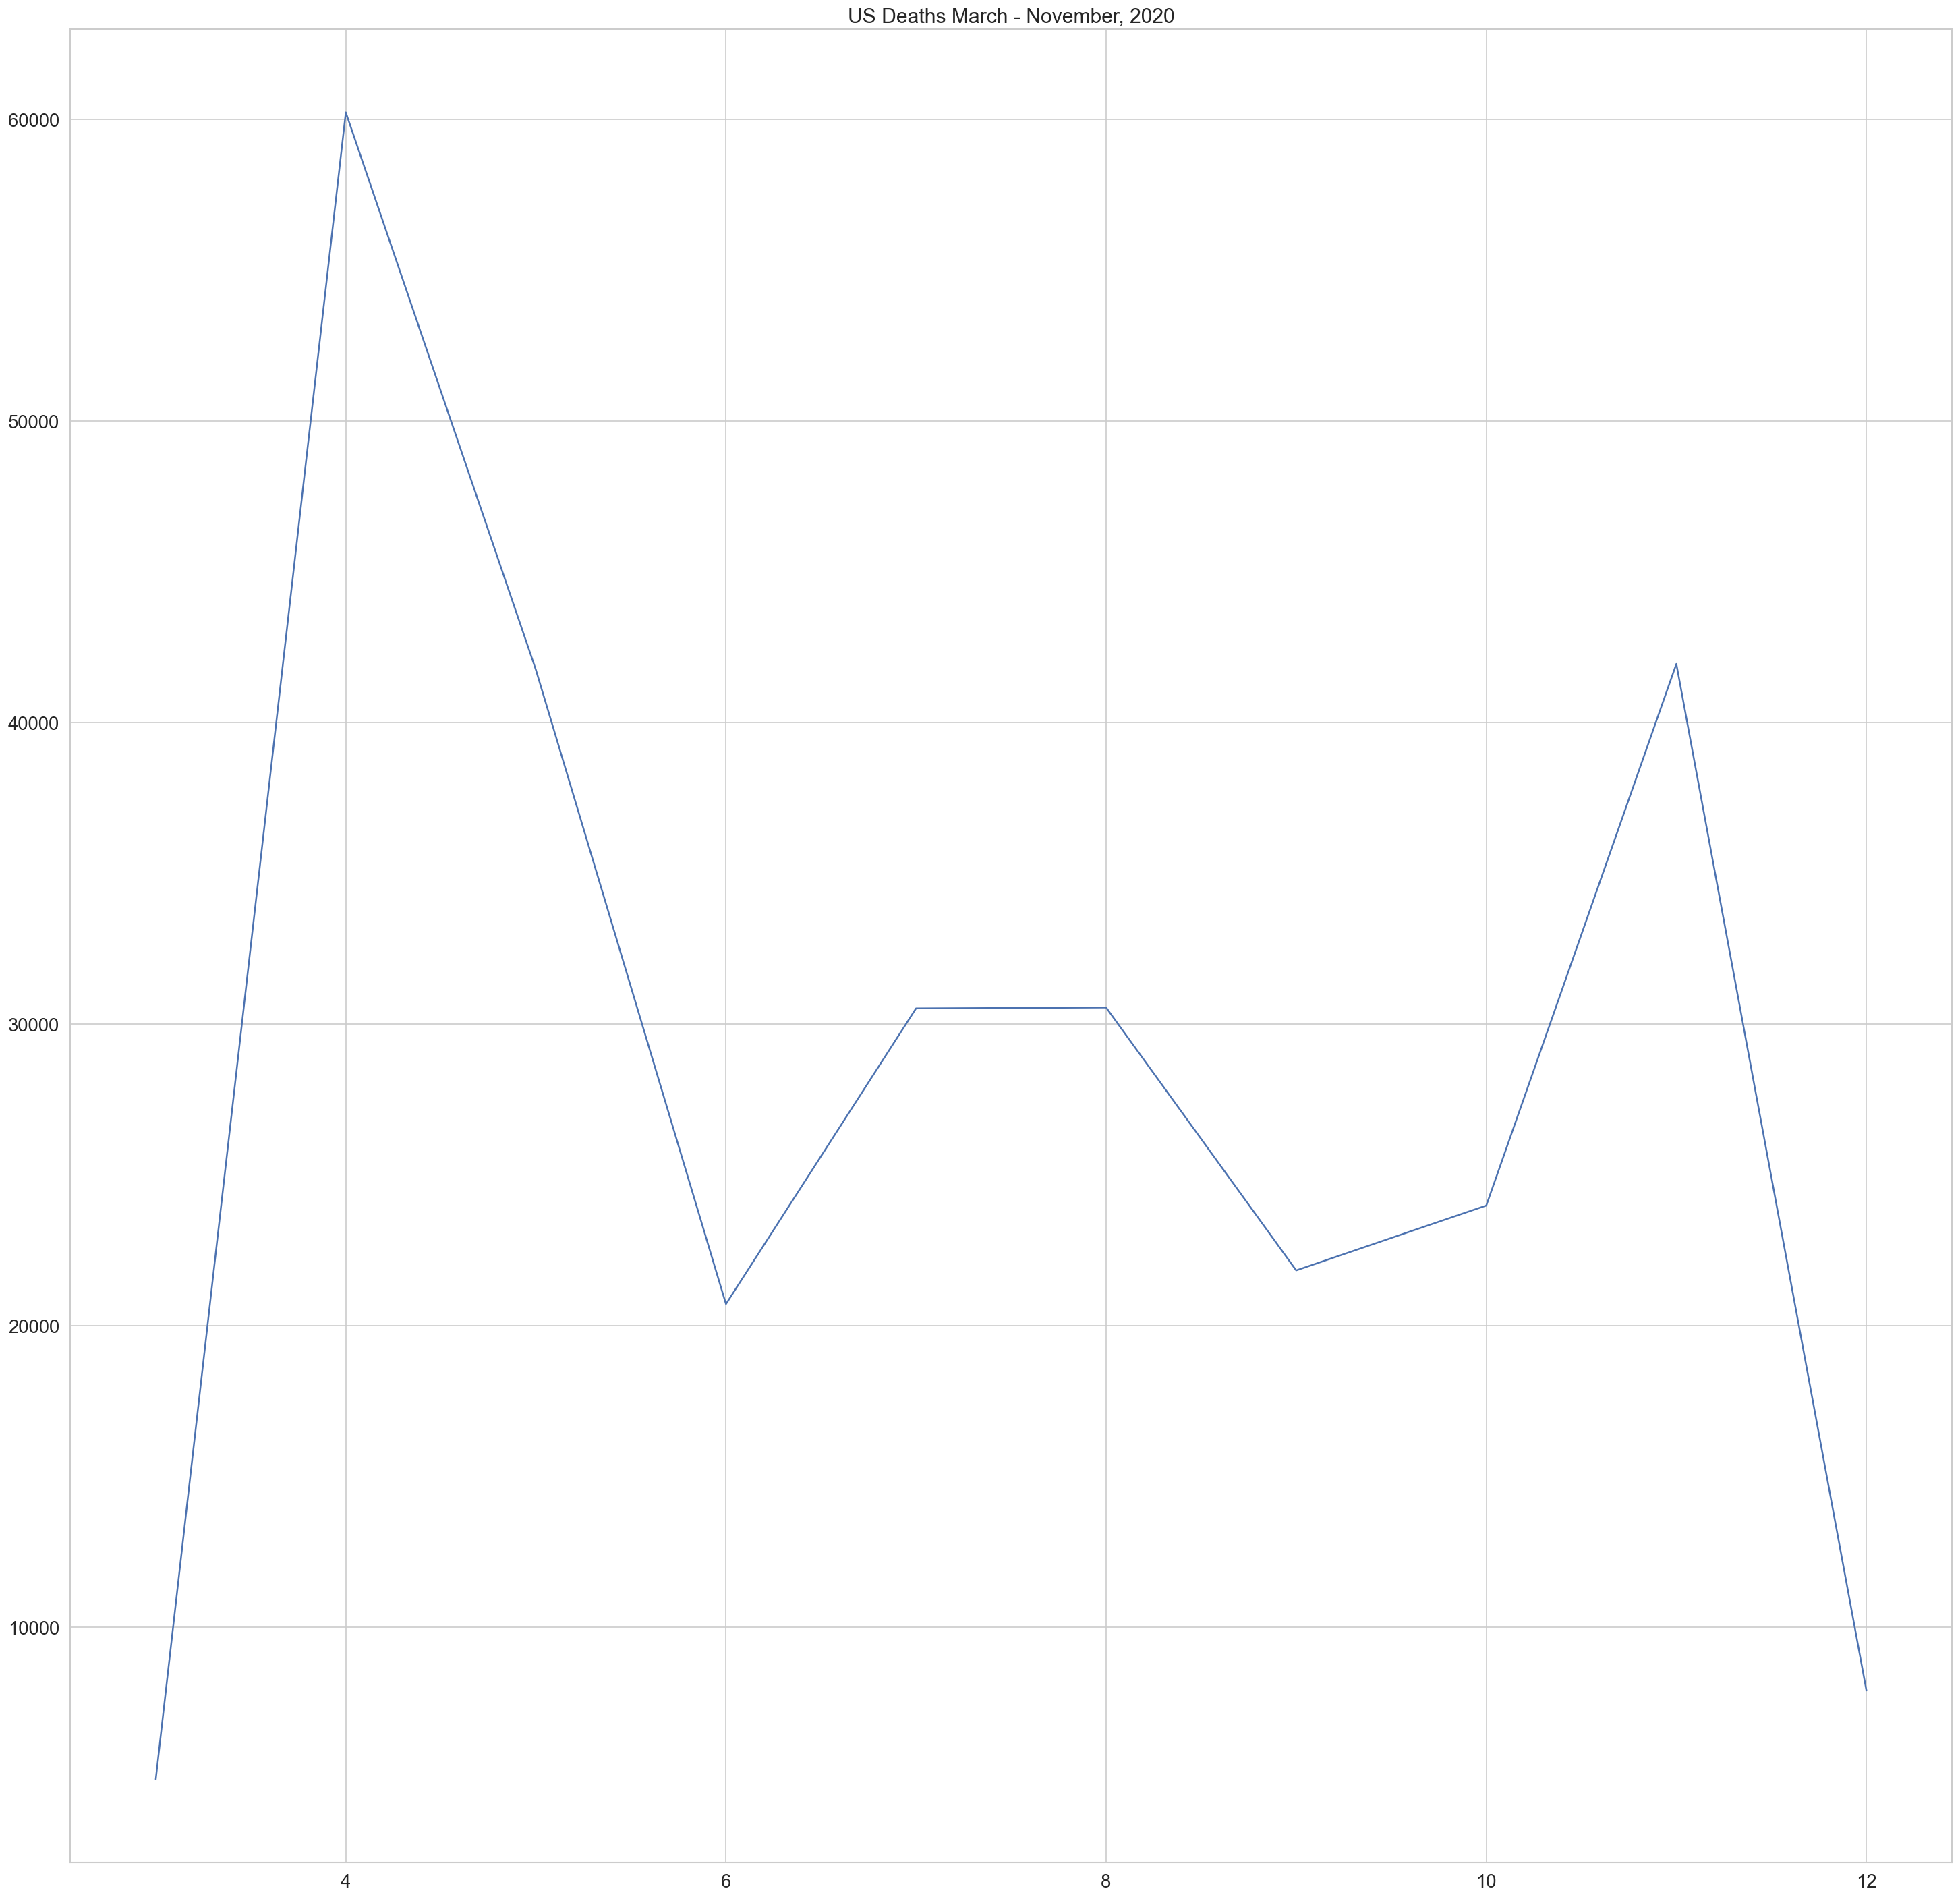

In [29]:
plt.plot(overall_cdc_new_cases.month, overall_cdc_new_cases.new_death)
plt.title("US Deaths March - November, 2020")





# Build Model Tables

In [8]:

cdc_covid_data_df_month_3 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_4 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_5 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_6 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_7 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_8 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_9 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_10 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_11 = cdc_covid_data_df.copy()
cdc_covid_data_df_month_12 = cdc_covid_data_df.copy()


cdc_covid_data_df_month_3 = cdc_covid_data_df_month_3.loc[cdc_covid_data_df_month_3.month == 3]
cdc_covid_data_df_month_4 = cdc_covid_data_df_month_4.loc[cdc_covid_data_df_month_4.month == 4]
cdc_covid_data_df_month_5 = cdc_covid_data_df_month_5.loc[cdc_covid_data_df_month_5.month == 5]
cdc_covid_data_df_month_6 = cdc_covid_data_df_month_6.loc[cdc_covid_data_df_month_6.month == 6]
cdc_covid_data_df_month_7 = cdc_covid_data_df_month_7.loc[cdc_covid_data_df_month_7.month == 7]
cdc_covid_data_df_month_8 = cdc_covid_data_df_month_8.loc[cdc_covid_data_df_month_8.month == 8]
cdc_covid_data_df_month_9 = cdc_covid_data_df_month_9.loc[cdc_covid_data_df_month_9.month == 9]
cdc_covid_data_df_month_10 = cdc_covid_data_df_month_10.loc[cdc_covid_data_df_month_10.month == 10]
cdc_covid_data_df_month_11 = cdc_covid_data_df_month_11.loc[cdc_covid_data_df_month_11.month == 11]
cdc_covid_data_df_month_12 = cdc_covid_data_df_month_12.loc[cdc_covid_data_df_month_12.month == 12]


cdc_covid_data_df_month_3.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)

cdc_covid_data_df_month_4.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)
cdc_covid_data_df_month_5.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)
cdc_covid_data_df_month_6.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)
cdc_covid_data_df_month_7.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)
cdc_covid_data_df_month_8.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)
cdc_covid_data_df_month_9.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)

cdc_covid_data_df_month_10.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)
cdc_covid_data_df_month_11.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)
cdc_covid_data_df_month_12.drop_duplicates(subset ="state", 
                     keep = 'first', inplace = True)

cdc_covid_data_df_month_3 = cdc_covid_data_df_month_3.loc[(cdc_covid_data_df_month_3.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_3.state != "N/A") &
                                                         (cdc_covid_data_df_month_3.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_3.state != "Virgin Islands")]
cdc_covid_data_df_month_4 = cdc_covid_data_df_month_4.loc[(cdc_covid_data_df_month_4.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_4.state != "N/A") &
                                                         (cdc_covid_data_df_month_4.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_4.state != "Virgin Islands")]

cdc_covid_data_df_month_5 = cdc_covid_data_df_month_5.loc[(cdc_covid_data_df_month_5.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_5.state != "N/A") &
                                                         (cdc_covid_data_df_month_5.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_5.state != "Virgin Islands")]
cdc_covid_data_df_month_6 = cdc_covid_data_df_month_6.loc[(cdc_covid_data_df_month_6.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_6.state != "N/A") &
                                                         (cdc_covid_data_df_month_6.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_6.state != "Virgin Islands")]

cdc_covid_data_df_month_7 = cdc_covid_data_df_month_7.loc[(cdc_covid_data_df_month_7.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_7.state != "N/A") &
                                                         (cdc_covid_data_df_month_7.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_7.state != "Virgin Islands")]

cdc_covid_data_df_month_8 = cdc_covid_data_df_month_8.loc[(cdc_covid_data_df_month_8.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_8.state != "N/A") &
                                                         (cdc_covid_data_df_month_8.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_8.state != "Virgin Islands")]

cdc_covid_data_df_month_9 = cdc_covid_data_df_month_9.loc[(cdc_covid_data_df_month_9.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_9.state != "N/A") &
                                                         (cdc_covid_data_df_month_9.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_9.state != "Virgin Islands")]
cdc_covid_data_df_month_10 = cdc_covid_data_df_month_10.loc[(cdc_covid_data_df_month_10.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_10.state != "N/A") &
                                                         (cdc_covid_data_df_month_10.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_10.state != "Virgin Islands")]

cdc_covid_data_df_month_11 = cdc_covid_data_df_month_11.loc[(cdc_covid_data_df_month_11.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_11.state != "N/A") &
                                                         (cdc_covid_data_df_month_11.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_11.state != "Virgin Islands")]

cdc_covid_data_df_month_12 = cdc_covid_data_df_month_12.loc[(cdc_covid_data_df_month_12.state != "American Samoa") & 
                                                         (cdc_covid_data_df_month_12.state != "N/A") &
                                                         (cdc_covid_data_df_month_12.state != "Northern Mariana Islands") &
                                                         (cdc_covid_data_df_month_12.state != "Virgin Islands")]

cdc_covid_data_df_month_3 = cdc_covid_data_df_month_3.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_4 = cdc_covid_data_df_month_4.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_5 = cdc_covid_data_df_month_5.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_6 = cdc_covid_data_df_month_6.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_7 = cdc_covid_data_df_month_7.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_8 = cdc_covid_data_df_month_8.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_9 = cdc_covid_data_df_month_9.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_10 = cdc_covid_data_df_month_10.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_11 = cdc_covid_data_df_month_11.rename(columns={'state': ('state', '')})
cdc_covid_data_df_month_12 = cdc_covid_data_df_month_12.rename(columns={'state': ('state', '')})



In [47]:
tweets_distribution_sentiment_geolocation_new_cases_deaths['sentiment_negative'] = tweets_distribution_sentiment_geolocation_new_cases_deaths['sentiment'] == -1

tweets_distribution_sentiment_geolocation_new_cases_deaths['sentiment_neutral'] = tweets_distribution_sentiment_geolocation_new_cases_deaths['sentiment'] == 0

tweets_distribution_sentiment_geolocation_new_cases_deaths['sentiment_positive'] = tweets_distribution_sentiment_geolocation_new_cases_deaths['sentiment'] == 1




In [49]:
march_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 3]
april_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 4]
may_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 5]
june_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 6]
july_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 7]
august_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 8]
september_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 9]
october_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 10]
november_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 11]
december_tweets_distribution_sentiment_geolocation_new_cases_deaths = tweets_distribution_sentiment_geolocation_new_cases_deaths.loc[tweets_distribution_sentiment_geolocation_new_cases_deaths['created_at_month'] == 12]









In [50]:
march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = march_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()

march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_3, how='left')

march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [51]:
april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = april_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()


april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_4, how='left')

april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



In [55]:
may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = may_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_5, how='left')

may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [56]:
june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = june_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_6, how='left')

june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



In [57]:
july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = july_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()


july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_7, how='left')
july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



In [58]:
august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = august_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_8, how='left')

august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



In [59]:
september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = september_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_9, how='left')

september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



In [60]:
october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = october_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_10, how='left')

october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



In [61]:
november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = november_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_11, how='left')

november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



In [62]:
december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = december_tweets_distribution_sentiment_geolocation_new_cases_deaths.copy()

december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.groupby(["state", "topic_id",]).agg({'count': 'sum', 'sentiment_negative': 'sum', 'sentiment_neutral': 'sum', 'sentiment_positive': 'sum'})

december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.unstack()
december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.reset_index()
december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.merge(cdc_covid_data_df_month_12, how='left')

december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df = december_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.set_index(('state', '' ))



# Model Comparision

In [63]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import IterativeImputer
from sklearn.datasets import *
from sklearn import tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.
from sklearn.linear_model import LinearRegression # Linear Regression class.
from sklearn.linear_model import LogisticRegression # Linear Regression class.
from sklearn.linear_model import SGDRegressor


#import xgboost as xgb
RSEED = 42
from sklearn.linear_model import LassoCV

from sklearn.metrics import mean_squared_error as MSE
from yellowbrick.regressor import ResidualsPlot, PredictionError

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#rf = RandomForestRegressor(random_state = 42)
from yellowbrick.regressor import AlphaSelection
from sklearn.model_selection import GridSearchCV

from pprint import pprint

In [70]:
march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df.shape
frames = [march_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         april_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         may_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         june_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         july_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         august_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         september_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         october_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df,
         november_tweets_distribution_sentiment_geolocation_new_cases_deaths_stack_df]

modeling_table = pd.concat(frames)
modeling_table = modeling_table.reset_index()
modeling_table['state'] = pd.factorize(modeling_table[('state', '')])[0]

modeling_table = modeling_table.drop(columns = [('state', '')])



In [94]:
modeling_table.head()

,"(count, 0)","(count, 1)","(count, 2)","(count, 3)","(count, 4)","(count, 5)","(count, 6)","(count, 7)","(count, 8)","(count, 9)","(count, 10)","(count, 11)","(count, 12)","(count, 13)","(count, 14)","(count, 15)","(count, 16)","(count, 17)","(count, 18)","(count, 19)","(count, 20)","(count, 21)","(count, 22)","(count, 23)","(count, 24)","(count, 25)","(count, 26)","(count, 27)","(count, 28)","(count, 29)","(count, 30)","(count, 31)","(count, 32)","(count, 33)","(count, 34)","(count, 35)","(count, 36)","(count, 37)","(count, 38)","(count, 39)","(count, 40)","(count, 41)","(count, 42)","(count, 43)","(count, 44)","(count, 45)","(count, 46)","(count, 47)","(count, 48)","(count, 49)","(count, 50)","(count, 51)","(count, 52)","(count, 53)","(count, 54)","(count, 55)","(count, 56)","(count, 57)","(count, 58)","(count, 59)","(count, 60)","(count, 61)","(count, 62)","(count, 63)","(count, 64)","(count, 65)","(count, 66)","(count, 67)","(count, 68)","(count, 69)","(count, 70)","(count, 71)","(count, 72)","(count, 73)","(count, 74)","(count, 75)","(sentiment_negative, 0)","(sentiment_negative, 1)","(sentiment_negative, 2)","(sentiment_negative, 3)","(sentiment_negative, 4)","(sentiment_negative, 5)","(sentiment_negative, 6)","(sentiment_negative, 7)","(sentiment_negative, 8)","(sentiment_negative, 9)","(sentiment_negative, 10)","(sentiment_negative, 11)","(sentiment_negative, 12)","(sentiment_negative, 13)","(sentiment_negative, 14)","(sentiment_negative, 15)","(sentiment_negative, 16)","(sentiment_negative, 17)","(sentiment_negative, 18)","(sentiment_negative, 19)","(sentiment_negative, 20)","(sentiment_negative, 21)","(sentiment_negative, 22)","(sentiment_negative, 23)","(sentiment_negative, 24)","(sentiment_negative, 25)","(sentiment_negative, 26)","(sentiment_negative, 27)","(sentiment_negative, 28)","(sentiment_negative, 29)","(sentiment_negative, 30)","(sentiment_negative, 31)","(sentiment_negative, 32)","(sentiment_negative, 33)","(sentiment_negative, 34)","(sentiment_negative, 35)","(sentiment_negative, 36)","(sentiment_negative, 37)","(sentiment_negative, 38)","(sentiment_negative, 39)","(sentiment_negative, 40)","(sentiment_negative, 41)","(sentiment_negative, 42)","(sentiment_negative, 43)","(sentiment_negative, 44)","(sentiment_negative, 45)","(sentiment_negative, 46)","(sentiment_negative, 47)","(sentiment_negative, 48)","(sentiment_negative, 49)","(sentiment_negative, 50)","(sentiment_negative, 51)","(sentiment_negative, 52)","(sentiment_negative, 53)","(sentiment_negative, 54)","(sentiment_negative, 55)","(sentiment_negative, 56)","(sentiment_negative, 57)","(sentiment_negative, 58)","(sentiment_negative, 59)","(sentiment_negative, 60)","(sentiment_negative, 61)","(sentiment_negative, 62)","(sentiment_negative, 63)","(sentiment_negative, 64)","(sentiment_negative, 65)","(sentiment_negative, 66)","(sentiment_negative, 67)","(sentiment_negative, 68)","(sentiment_negative, 69)","(sentiment_negative, 70)","(sentiment_negative, 71)","(sentiment_negative, 72)","(sentiment_negative, 73)","(sentiment_negative, 74)","(sentiment_negative, 75)","(sentiment_neutral, 0)","(sentiment_neutral, 1)","(sentiment_neutral, 2)","(sentiment_neutral, 3)","(sentiment_neutral, 4)","(sentiment_neutral, 5)","(sentiment_neutral, 6)","(sentiment_neutral, 7)","(sentiment_neutral, 8)","(sentiment_neutral, 9)","(sentiment_neutral, 10)","(sentiment_neutral, 11)","(sentiment_neutral, 12)","(sentiment_neutral, 13)","(sentiment_neutral, 14)","(sentiment_neutral, 15)","(sentiment_neutral, 16)","(sentiment_neutral, 17)","(sentiment_neutral, 18)","(sentiment_neutral, 19)","(sentiment_neutral, 20)","(sentiment_neutral, 21)","(sentiment_neutral, 22)","(sentiment_neutral, 23)","(sentiment_neutral, 24)","(sentiment_neutral, 25)","(sentiment_neutral, 26)","(sentiment_neutral, 27)","(sentiment_neutral, 28)","(sentiment_neutral, 29)","(sentiment_neutral, 30)","(sentiment_neutral, 31)","(sentiment_neutral, 32)","(sentiment_neutral, 33)","(sentiment_neutral, 34)","(s

## New Cases

In [95]:
train_features_new_cases, test_features_new_cases, train_labels_new_cases, test_labels_new_cases = train_test_split(modeling_table.drop(columns=['month', 'new_case', 'new_death']), modeling_table.new_case, test_size = 0.33, random_state=42)

def scores(i):
    lin = i()
    lin.fit(train_features_new_cases, train_labels_new_cases)
    y_pred=lin.predict(test_features_new_cases)
    lin_r=r2_score(test_labels_new_cases, y_pred)
    s.append(lin_r)

   
algos=[LinearRegression, KNeighborsRegressor, RandomForestRegressor, Lasso, Ridge, DecisionTreeRegressor, LogisticRegression ]
s=[]

for i in algos:
    scores(i)
   
models = pd.DataFrame({'Method': ['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor', 'Lasso', 'Ridge', 'DecisionTreeRegressor', 'LogisticRegression'],
                      'Score': [s[0],s[1], s[2], s[3], s[4], s[5], s[6]]})
models.sort_values(by='Score', ascending=False)



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9617304550.30529, tolerance: 71346946.0314019
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Method,Score
1,KNeighborsRegressor,0.546510
2,RandomForestRegressor,0.444731
5,DecisionTreeRegressor,0.054886
6,LogisticRegression,-0.533013
3,Lasso,-4.173349
4,Ridge,-4.530798
0,LinearRegression,-13.325335


## New Deaths

In [96]:

train_features_new_deaths, test_features_new_deaths, train_labels_new_deaths, test_labels_new_deaths = train_test_split(modeling_table.drop(columns=['month', 'new_case', 'new_death']), modeling_table.new_death, test_size = 0.33, random_state=42)

def scores(i):
    lin = i()
    lin.fit(train_features_new_deaths, train_labels_new_deaths)
    y_pred=lin.predict(test_features_new_deaths)
    lin_r=r2_score(test_labels_new_deaths, y_pred)
    s.append(lin_r)

   
algos=[LinearRegression, KNeighborsRegressor, RandomForestRegressor, Lasso, Ridge, DecisionTreeRegressor,LogisticRegression ]
s=[]

for i in algos:
    scores(i)
   
models = pd.DataFrame({'Method': ['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor', 'Lasso', 'Ridge', 'DecisionTreeRegressor', 'LogisticRegression'],
                      'Score': [s[0],s[1], s[2], s[3], s[4], s[5], s[6]]})
models.sort_values(by='Score', ascending=False)


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2318579.0386159695, tolerance: 20612.32661943574
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Method,Score
2,RandomForestRegressor,0.421444
1,KNeighborsRegressor,0.366727
5,DecisionTreeRegressor,-0.013027
6,LogisticRegression,-0.236004
3,Lasso,-0.791544
4,Ridge,-1.103195
0,LinearRegression,-3.230507


# Predictive Modeling - Random Forests

In [97]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    print('train_time', min(train_time))
    print('max', max(train_time))

    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = 0, ymax = 1)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('R2')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 35.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

## New Deaths

In [98]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import shap


In [99]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

# # train_features_new_cases, test_features_new_cases, train_labels_new_cases, test_labels_new_cases
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='r2', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_search.fit(train_features_new_deaths, train_labels_new_deaths)

{'bootstrap': [True, False],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [100]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    r2 = r2_score(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    rmse = sqrt(mse)
    print('Model Performance')
    print('R2: {:0.4f} degrees.'.format(r2))
    print('mse = {:0.2f}'.format(mse))
    print('rmse = {:0.2f}'.format(rmse))


    
    return r2

In [101]:
base_model = RandomForestRegressor(random_state = 42)
base_model.fit(train_features_new_deaths, train_labels_new_deaths)
base_accuracy = evaluate(base_model, test_features_new_deaths, test_labels_new_deaths)

Model Performance
R2: 0.4152 degrees.
mse = 668187.40
rmse = 817.43


In [102]:
rf_search.best_estimator_

RandomForestRegressor(min_samples_leaf=4, min_samples_split=5, n_estimators=445,
                      random_state=42)

In [103]:
best_rf_search = rf_search.best_estimator_
random_accuracy = evaluate(best_rf_search, test_features_new_deaths, test_labels_new_deaths)

Model Performance
R2: 0.4223 degrees.
mse = 660024.24
rmse = 812.42


In [104]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of 1.72%.


In [105]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 600, 1000, 2000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [106]:
# Fit the grid search to the data
grid_search.fit(test_features_new_deaths, test_labels_new_deaths)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.6min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [500, 600, 1000, 2000]},
             return_train_score=True, verbose=2)

In [107]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_leaf=5, min_samples_split=8,
                      n_estimators=2000, random_state=42)

In [108]:
final_model_new_deaths = grid_search.best_estimator_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features_new_deaths, test_labels_new_deaths)

Model Performance
R2: 0.7198 degrees.
mse = 320156.27
rmse = 565.82


In [109]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Improvement of 73.37%.


### Plotting number of features at each split


In [110]:
feature_grid = {'max_features': list(range(1, train_features_new_deaths.shape[1] + 1))}

# Create the grid search and fit on the training data
feature_grid_search = GridSearchCV(final_model_new_deaths, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'r2', return_train_score=True)
feature_grid_search.fit(train_features_new_deaths, train_labels_new_deaths);


Fitting 3 folds for each of 305 candidates, totalling 915 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 915 out of 915 | elapsed: 39.2min finished


train_time 3.8423778216044107
max 46.887704372406006


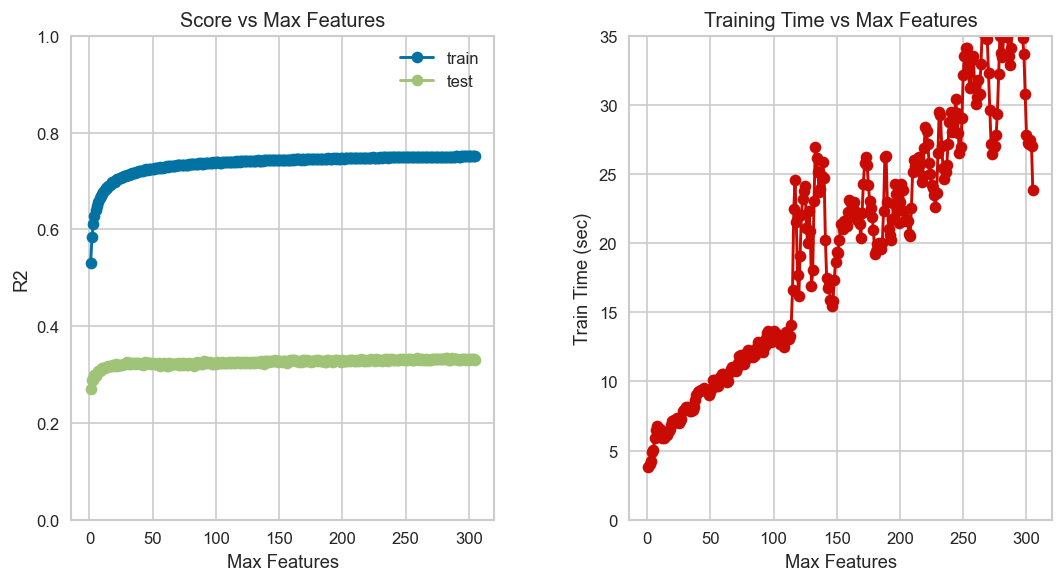

In [111]:
plot_results(feature_grid_search, param='max_features', name = 'Max Features')


### Number of Trees

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   30.7s finished


train_time 0.014250516891479492
max 4.710369348526001


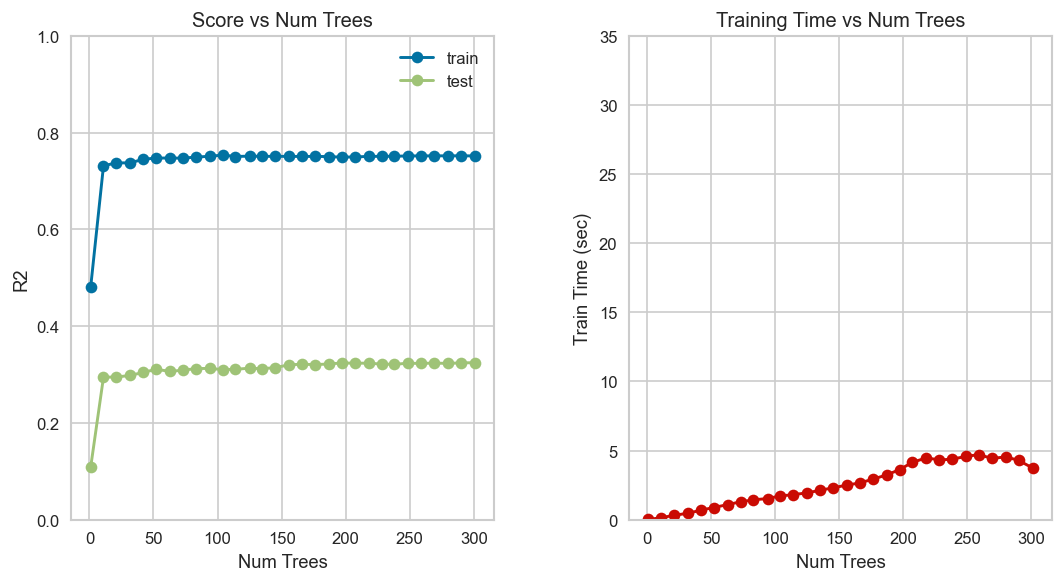

In [112]:
# Grid with only the number of trees changed
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 301, 30)]}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(final_model_new_deaths, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 3,
                                scoring = 'r2', return_train_score=True)
tree_grid_search.fit(train_features_new_deaths, train_labels_new_deaths);
plot_results(tree_grid_search)


In [113]:
# Use sklearn to export the tree 
from sklearn.tree import export_graphviz

# Write the decision tree as a dot file
visual_tree = final_model_new_deaths.estimators_[12]
export_graphviz(visual_tree, out_file = 'images/best_tree_new_deaths.dot', feature_names = train_features_new_deaths.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)
import pydot

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('images/best_tree_new_deaths.dot')
graph.write_png('images/best_tree_new_deaths.png')

### Feature importance - Shap Values

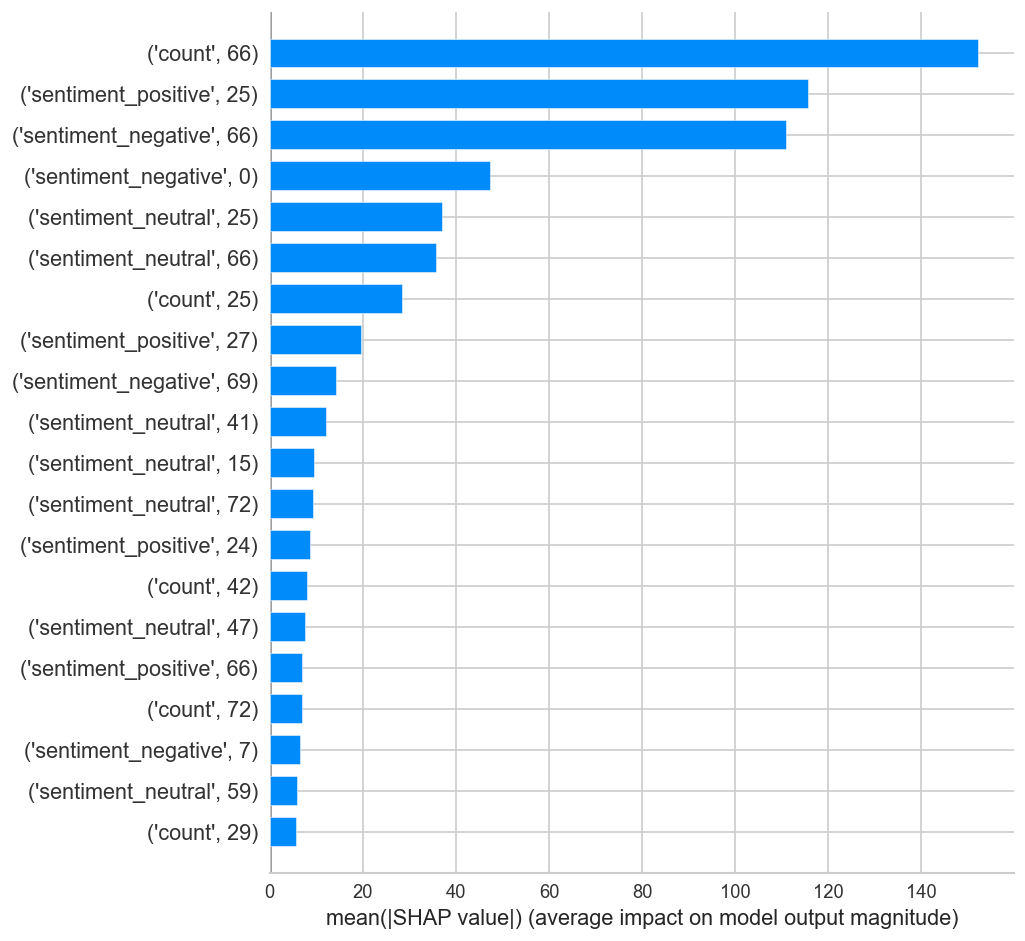

In [114]:
explainer = shap.TreeExplainer(final_model_new_deaths)
shap_values = explainer.shap_values(test_features_new_deaths)
shap.summary_plot(shap_values, test_features_new_deaths, plot_type="bar")


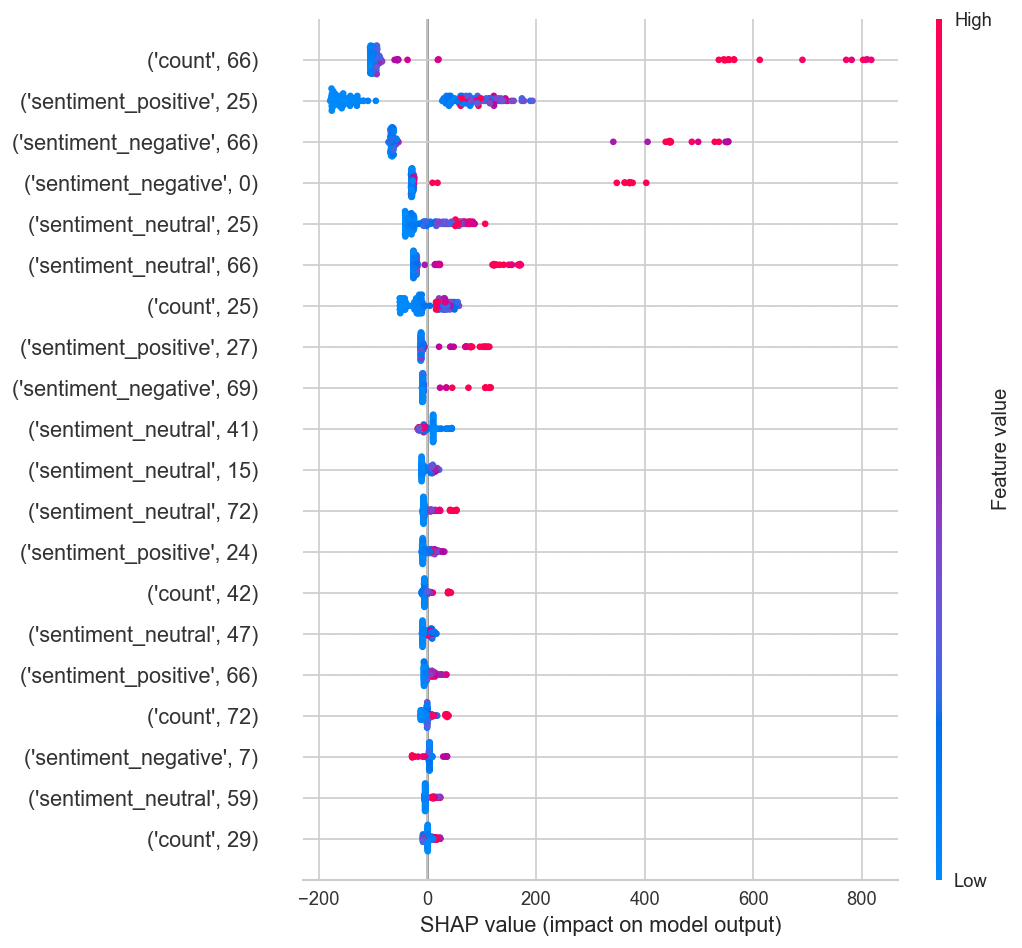

In [115]:
shap.summary_plot(shap_values, test_features_new_deaths)


### Feature importance - Permuation Importance

Text(0.5, 0, 'Permutation Importance')

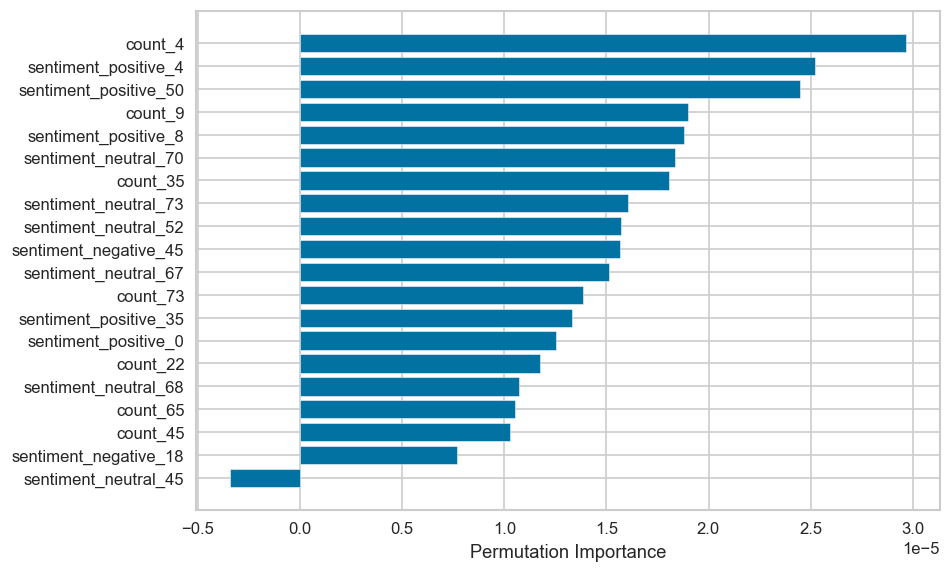

In [116]:
modeling_table_new_deaths = modeling_table.drop(columns=['month', 'new_case', 'new_death'])

test_features_new_deaths
test_features_new_deaths.columns
test_features_new_deaths.columns = ['{}_{}'.format(x[0], x[1]) for x in test_features_new_deaths.columns]

perm_importance = permutation_importance(final_model_new_deaths, test_features_new_deaths, test_labels_new_deaths, random_state=42, n_jobs=2, n_repeats=10)

sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(test_features_new_deaths.columns[sorted_idx][:20], perm_importance.importances_mean[sorted_idx][:20])
plt.xlabel("Permutation Importance")

## New Cases

In [117]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

# # train_features_new_cases, test_features_new_cases, train_labels_new_cases, test_labels_new_cases
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='r2', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_search.fit(train_features_new_cases, train_labels_new_cases)

{'bootstrap': [True, False],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=2)

In [118]:
base_model = RandomForestRegressor(random_state = 42)
base_model.fit(train_features_new_cases, train_labels_new_cases)
base_accuracy = evaluate(base_model, test_features_new_cases, test_labels_new_cases)

Model Performance
R2: 0.4517 degrees.
mse = 1020444018.44
rmse = 31944.39


In [119]:
rf_search.best_estimator_

RandomForestRegressor(min_samples_leaf=2, n_estimators=336, random_state=42)

In [120]:
best_rf_search = rf_search.best_estimator_
random_accuracy = evaluate(best_rf_search, test_features_new_cases, test_labels_new_cases)

Model Performance
R2: 0.4541 degrees.
mse = 1015947654.78
rmse = 31873.93


In [121]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Improvement of 0.53%.


In [122]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 600, 1000, 2000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [123]:
# Fit the grid search to the data
grid_search.fit(test_features_new_cases, test_labels_new_cases)
final_model_new_cases = grid_search.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.0min finished


In [124]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features_new_cases, test_labels_new_cases)

Model Performance
R2: 0.8457 degrees.
mse = 287112720.62
rmse = 16944.40


In [125]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_leaf=3, min_samples_split=8,
                      n_estimators=2000, random_state=42)

In [126]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Improvement of 87.25%.


### Plotting number of features at each split


Fitting 3 folds for each of 305 candidates, totalling 915 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 915 out of 915 | elapsed: 41.0min finished


train_time 4.152514775594075
max 42.13660709063212


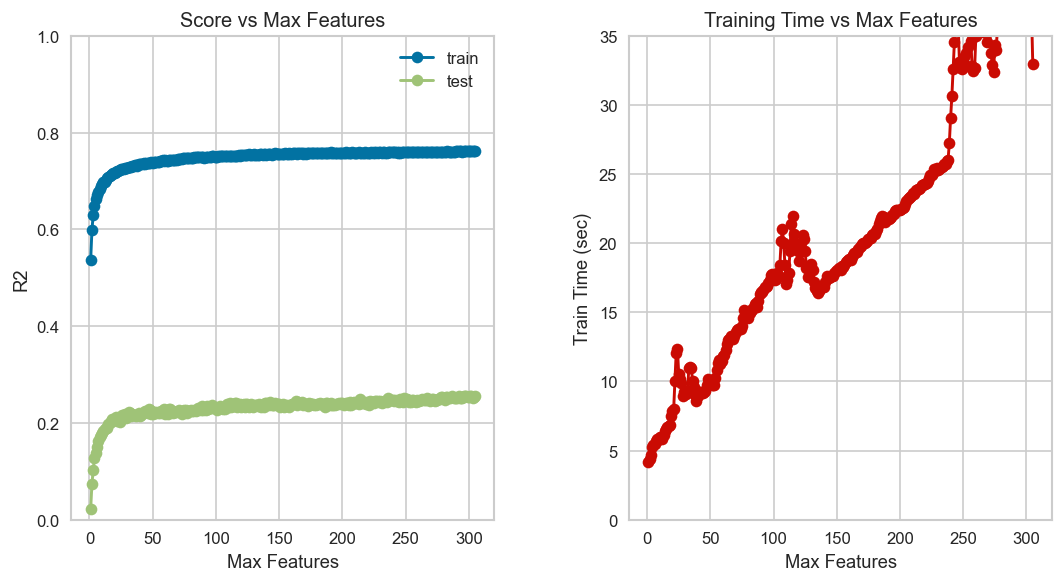

In [127]:
feature_grid = {'max_features': list(range(1, train_features_new_cases.shape[1] + 1))}

# Create the grid search and fit on the training data
feature_grid_search = GridSearchCV(final_model_new_cases, param_grid=feature_grid, cv = 3, n_jobs=-1, verbose= 2,
                                  scoring = 'r2', return_train_score=True)
feature_grid_search.fit(train_features_new_cases, train_labels_new_cases);

plot_results(feature_grid_search, param='max_features', name = 'Max Features')


### Number of Trees

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   32.6s finished


train_time 0.017722606658935547
max 5.255019664764404


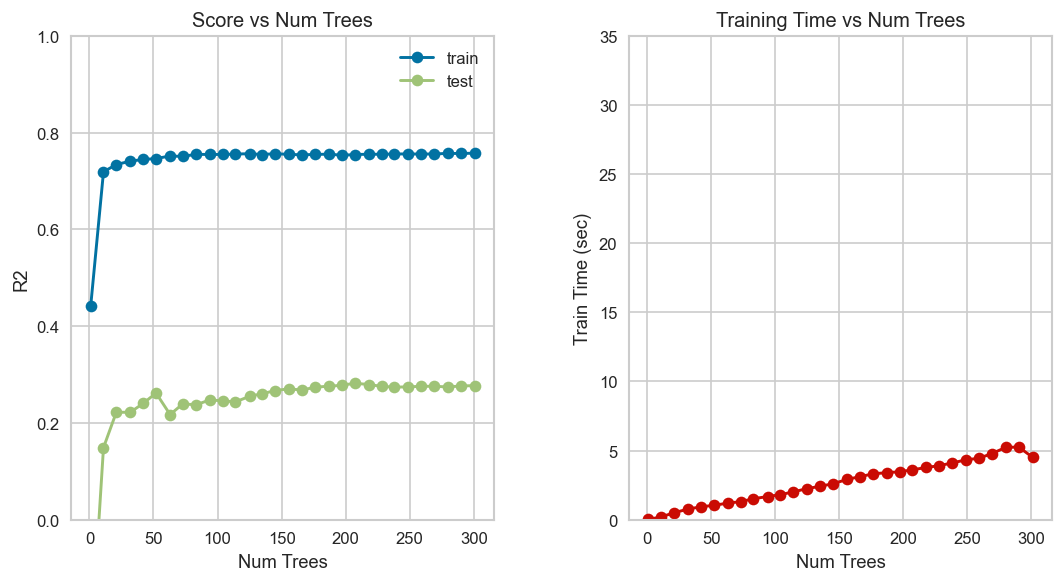

In [128]:
# Grid with only the number of trees changed
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 301, 30)]}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(final_model_new_cases, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 3,
                                scoring = 'r2', return_train_score=True)
tree_grid_search.fit(train_features_new_cases, train_labels_new_cases);
plot_results(tree_grid_search)


In [129]:
# Use sklearn to export the tree 
from sklearn.tree import export_graphviz

# Write the decision tree as a dot file
visual_tree = final_model_new_cases.estimators_[12]
export_graphviz(visual_tree, out_file = 'images/best_tree_new_cases.dot', feature_names = train_features_new_cases.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)
import pydot

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('images/best_tree_new_cases.dot')
graph.write_png('images/best_tree_new_cases.png')

### Feature importance - Shap Values

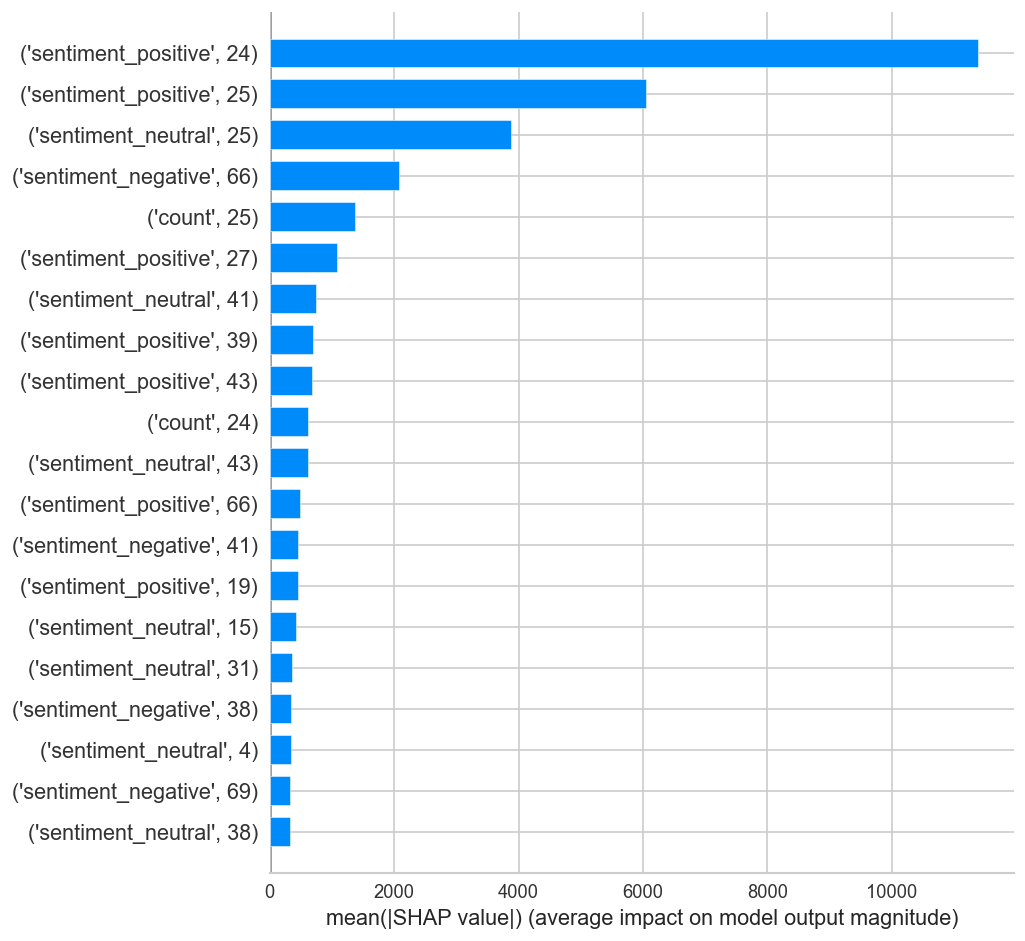

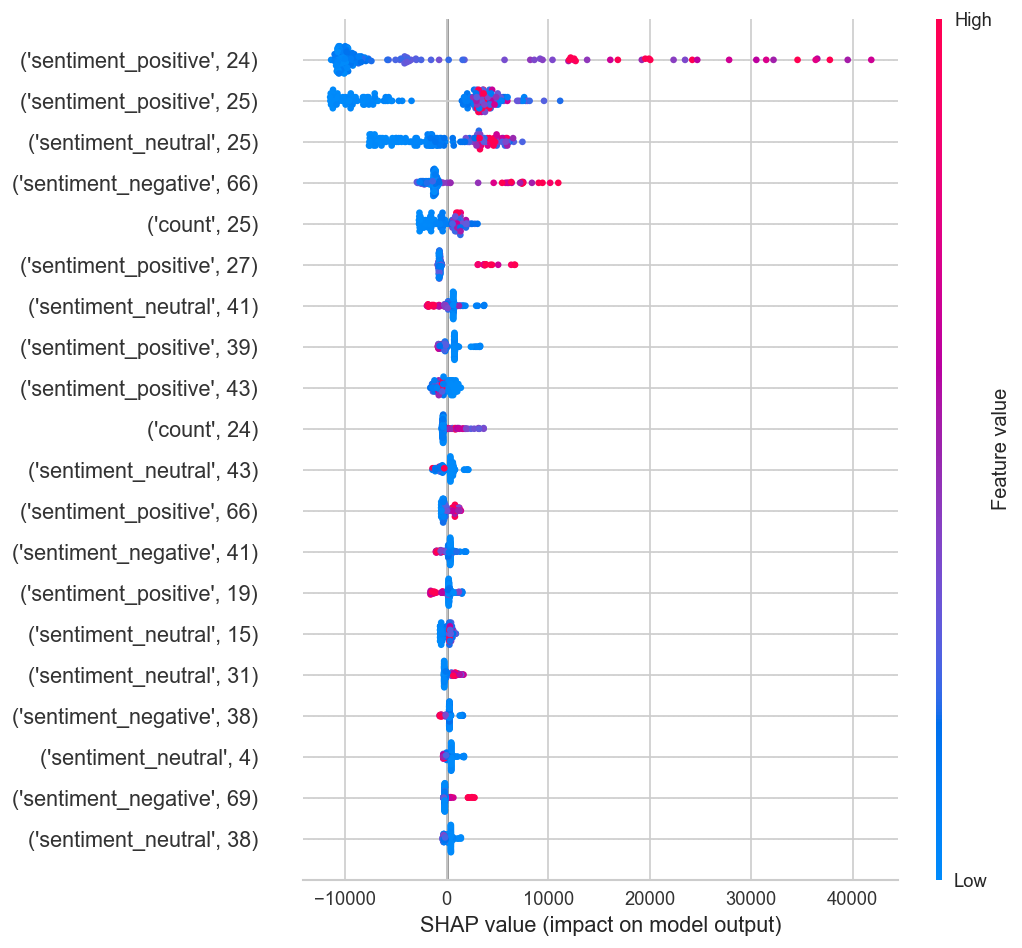

In [130]:
explainer = shap.TreeExplainer(final_model_new_cases)
shap_values = explainer.shap_values(test_features_new_cases)
shap.summary_plot(shap_values, test_features_new_cases, plot_type="bar")
shap.summary_plot(shap_values, test_features_new_cases)


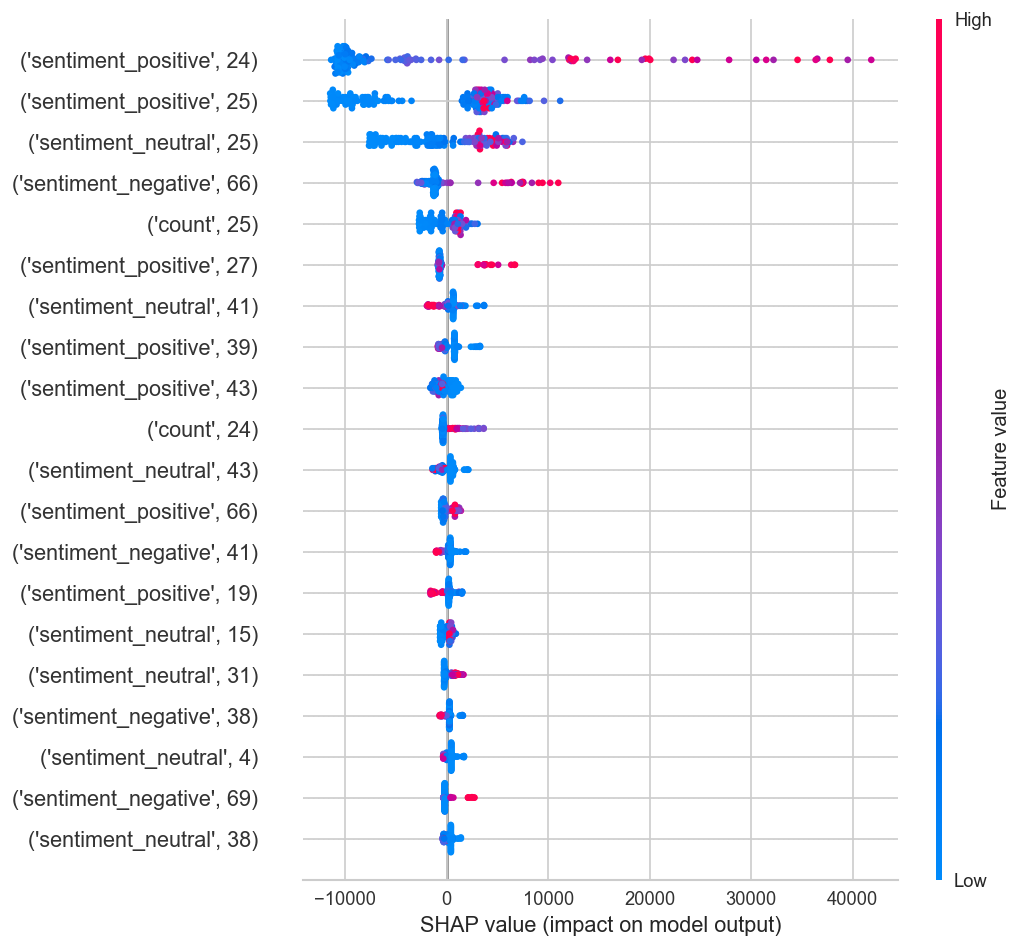

In [131]:
shap.summary_plot(shap_values, test_features_new_cases)


### Feature importance - Permuation Importance

In [132]:
modeling_table_new_cases = modeling_table.drop(columns=['month', 'new_case', 'new_death'])

test_features_new_cases
test_features_new_cases.columns
test_features_new_cases.columns = ['{}_{}'.format(x[0], x[1]) for x in test_features_new_cases.columns]


In [133]:
perm_importance = permutation_importance(final_model_new_cases, test_features_new_cases, test_labels_new_cases, random_state=42, n_jobs=2, n_repeats=10)


Text(0.5, 0, 'Permutation Importance')

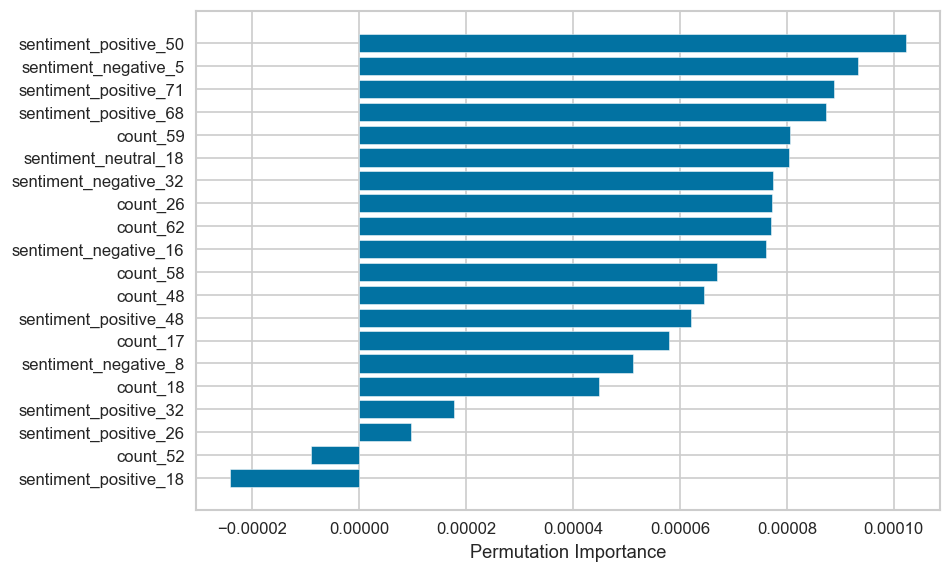

In [134]:
sorted_idx = perm_importance.importances_mean.argsort()
sorted_idx

plt.barh(test_features_new_cases.columns[sorted_idx][:20], perm_importance.importances_mean[sorted_idx][:20])
plt.xlabel("Permutation Importance")